In [1]:
!pip install pyspc

In [2]:
from pyspc import spc, xbar_rbar, rbar, rules
import numpy as np
#from scipy import stats
from scipy.stats import norm
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns; sns.set()

In [3]:
X = pd.read_csv('/content/Book1.csv', index_col=0)
print(X)

          Closing Volume        Volume  50-Day Moving Average  \
Date                                                            
01-01-20        6.698408  295689.37230              55.356753   
02-01-20       61.452089  847607.11960              56.107148   
03-01-20       21.911287  804114.07660              55.246507   
04-01-20       47.445713  844474.63390              56.443637   
05-01-20       88.814258   36360.73427              57.048413   
...                  ...           ...                    ...   
31-10-26       77.003079  639101.17020              50.909277   
01-11-26       24.143474  305621.07870              44.385826   
02-11-26       42.801110  212041.52470              51.133276   
03-11-26       92.168572  591625.99970              55.299359   
04-11-26       18.430147  712776.93880              18.430147   

          200-Day Moving Average  
Date                              
01-01-20               54.001058  
02-01-20               54.034503  
03-01-20      

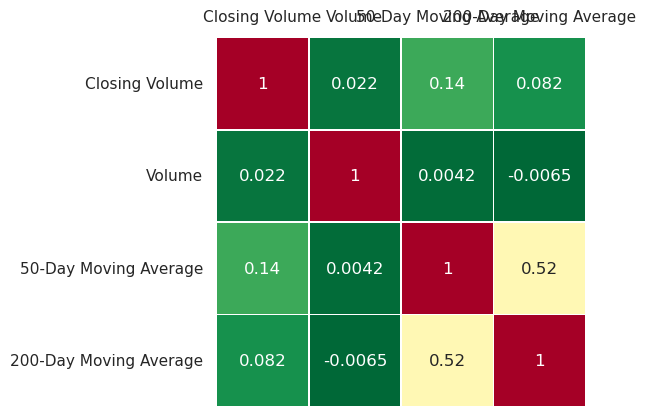

In [5]:
#Correlation matrix
plt.figure()
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)

In [6]:
#(a) and (b)
X = np.array(X)
Xbar = np.mean(X, axis=1)
Xbarbar = np.mean(Xbar)
R = np.ptp(X, axis=1)
Rbar = np.mean(R)
d2 = 2.059
sigmahat = Rbar/d2
print('The process mean and standard deviation are:')
print('Xbarbar = {0:.2f}, sigmahat = {1:.2f}'.format(Xbarbar, sigmahat))

The process mean and standard deviation are:
Xbarbar = 123251.62, sigmahat = 239349.18


In [7]:
!pip install matplotlib==3.2.2

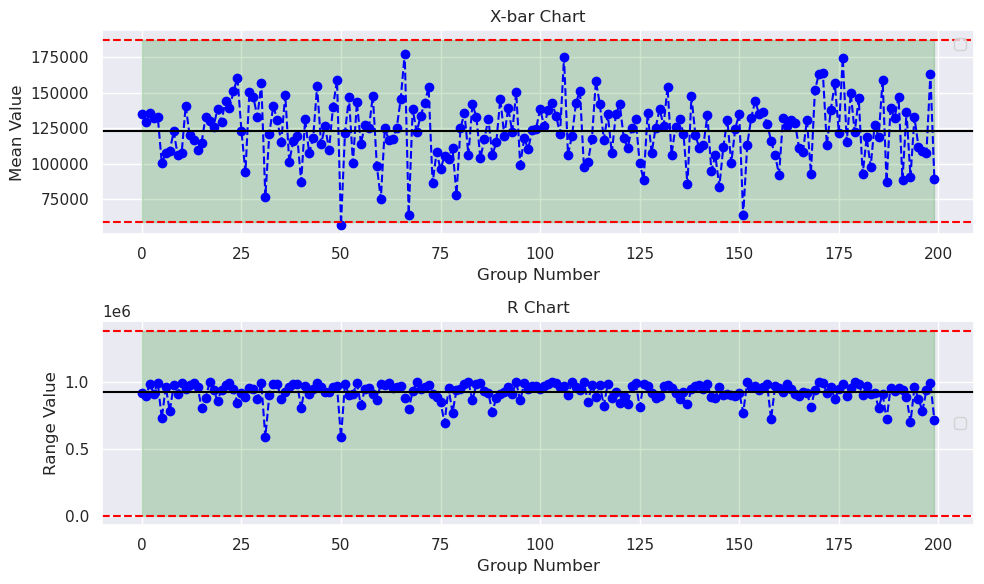

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspc import spc, xbar_rbar, rbar, rules

# Original Data
X = pd.read_csv('/content/Book1.csv', index_col=0).values.flatten()  # Flatten in case of DataFrame structure

# Group data into groups of 50
group_size = 50
num_groups = len(X) // group_size
X_grouped = [X[i * group_size:(i + 1) * group_size] for i in range(num_groups)]

# Calculate grouped means and ranges
Xbar_grouped = np.array([np.mean(group) for group in X_grouped])  # Group means
R_grouped = np.array([np.ptp(group) for group in X_grouped])      # Group ranges

# Plot X-bar Chart
plt.figure(figsize=(10, 6))

# X-bar Chart
plt.subplot(2, 1, 1)
plt.plot(Xbar_grouped, marker='o', linestyle='--', color='blue', label="")  # Distinct points and dashed lines
plt.axhline(np.mean(Xbar_grouped), color='black', linestyle='-', label="")
plt.axhline(np.mean(Xbar_grouped) + 3 * np.std(Xbar_grouped), color='red', linestyle='--', label="")
plt.axhline(np.mean(Xbar_grouped) - 3 * np.std(Xbar_grouped), color='red', linestyle='--', label="")
plt.fill_between(range(len(Xbar_grouped)),
                 np.mean(Xbar_grouped) - 3 * np.std(Xbar_grouped),
                 np.mean(Xbar_grouped) + 3 * np.std(Xbar_grouped),
                 color='green', alpha=0.2)
plt.title("X-bar Chart")
plt.xlabel("Group Number")
plt.ylabel("Mean Value")
plt.legend()

# R Chart
plt.subplot(2, 1, 2)
plt.plot(R_grouped, marker='o', linestyle='--', color='blue', label="")  # Distinct points and dashed lines
plt.axhline(np.mean(R_grouped), color='black', linestyle='-', label="")
plt.axhline(np.mean(R_grouped) * 1.5, color='red', linestyle='--', label="")  # Approximate UCL for ranges
plt.axhline(0, color='red', linestyle='--', label="")
plt.fill_between(range(len(R_grouped)), 0, np.mean(R_grouped) * 1.5, color='green', alpha=0.2)
plt.title("R Chart")
plt.xlabel("Group Number")
plt.ylabel("Range Value")
plt.legend()

# Show Charts
plt.tight_layout()
plt.show()


In [27]:
#(d)
LSL = 20;  USL = 1000
Cp = (USL-LSL)/(6*sigmahat)
CpL = (Xbarbar-LSL)/(3*sigmahat)
CpU = (USL-Xbarbar)/(3*sigmahat)
Cpk = np.min([CpL, CpU])
print('The process capability indices are:')
print('Cp = {0:.2f}, CpL = {1:.2f}, CpU = {2:.2f}, Cpk = {3:.2f}'.format(Cp, CpL, CpU, Cpk))
#Percentage of Nonconforming
PNC = 1-(norm.cdf((USL-Xbarbar)/sigmahat)-norm.cdf((LSL-Xbarbar)/sigmahat))
print('The total percentage of nonconforming produced by the process is:')
print('PNC = {:.4f}'.format(PNC))

The process capability indices are:
Cp = 0.00, CpL = 0.41, CpU = -0.41, Cpk = -0.41
The total percentage of nonconforming produced by the process is:
PNC = 0.9982


## Ungrouped Statistics

       Date  Closing Volume        Volume  50-Day Moving Average  \
0  01-01-20        6.698408  295689.37230              55.356753   
1  02-01-20       61.452089  847607.11960              56.107148   
2  03-01-20       21.911287  804114.07660              55.246507   
3  04-01-20       47.445713  844474.63390              56.443637   
4  05-01-20       88.814258   36360.73427              57.048413   

   200-Day Moving Average  
0               54.001058  
1               54.034503  
2               54.222753  
3               54.207440  
4               53.992278  

Normalized Data:
   Closing Volume    Volume  50-Day Moving Average  200-Day Moving Average
0       -1.481524 -0.679648               1.342512                1.929189
1        0.392680  1.222848               1.528184                1.944930
2       -0.960791  1.072924               1.315234                2.033533
3       -0.086755  1.212050               1.611443                2.026326
4        1.329280 -1.573571   

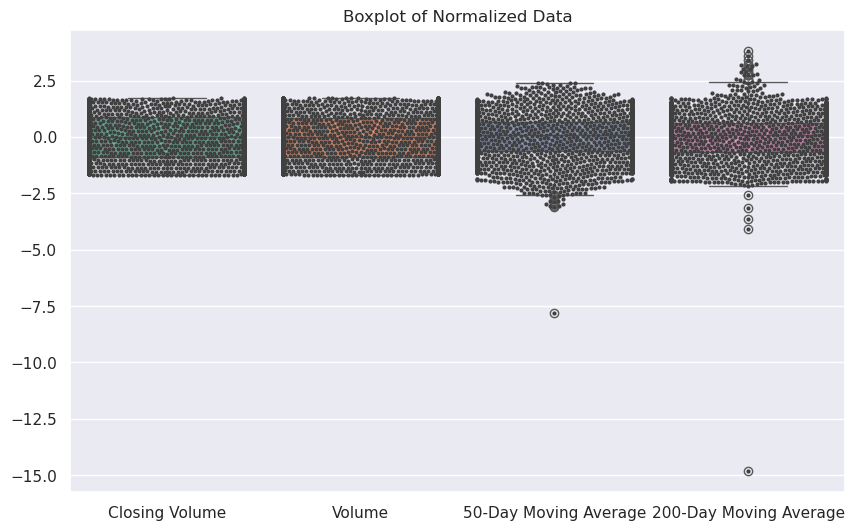

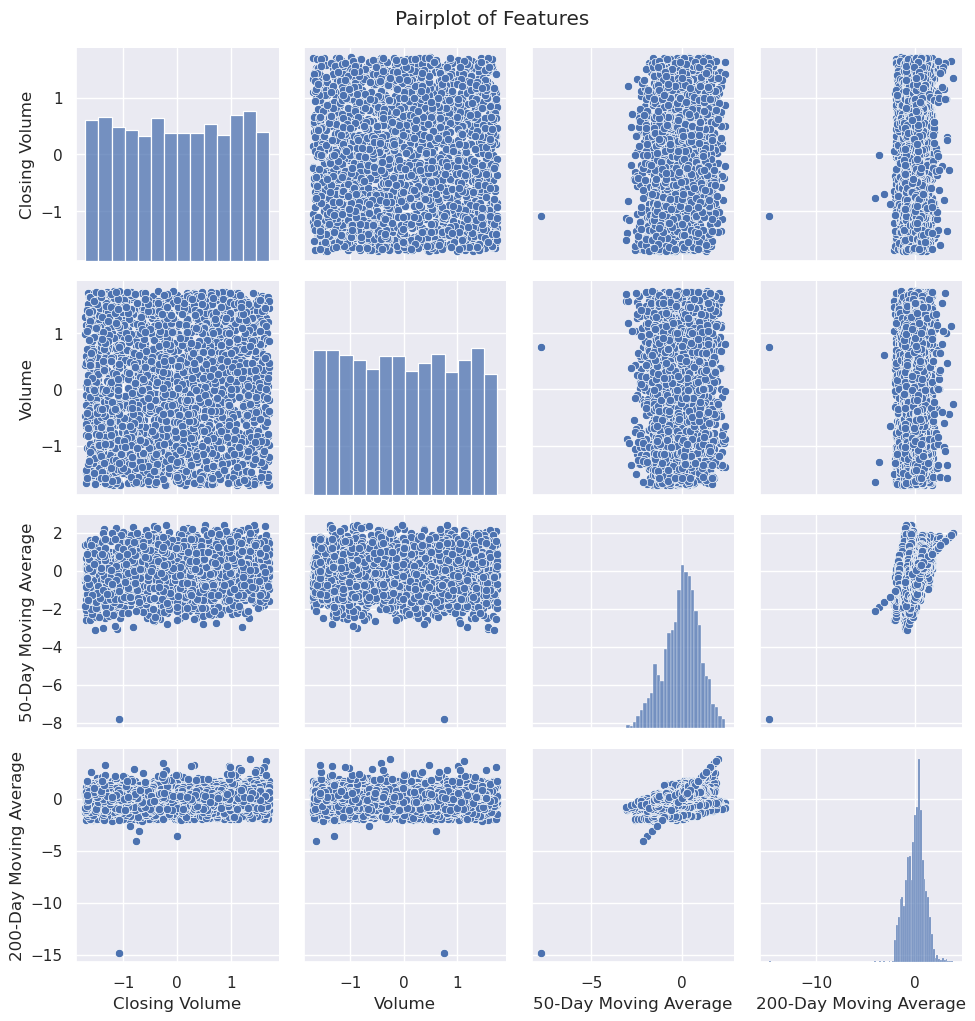

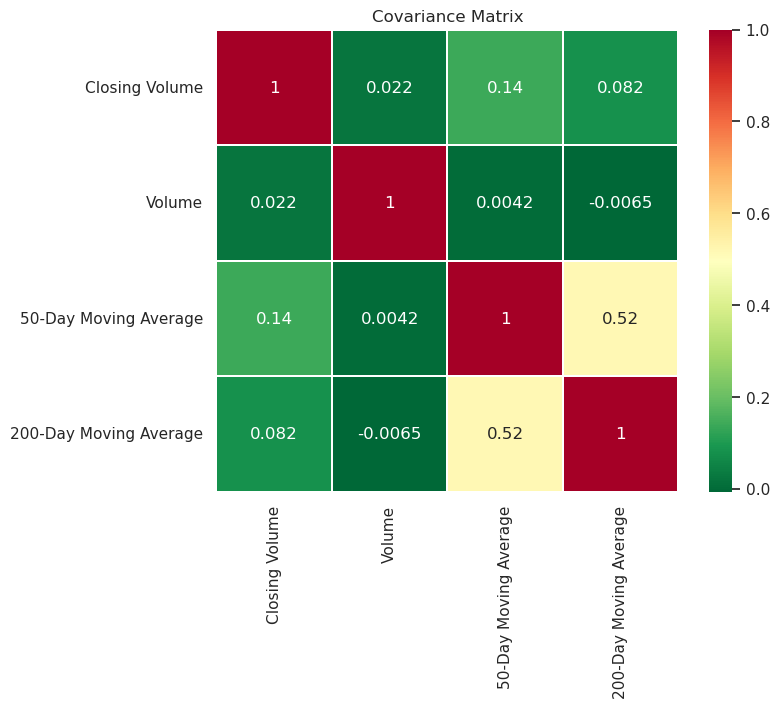

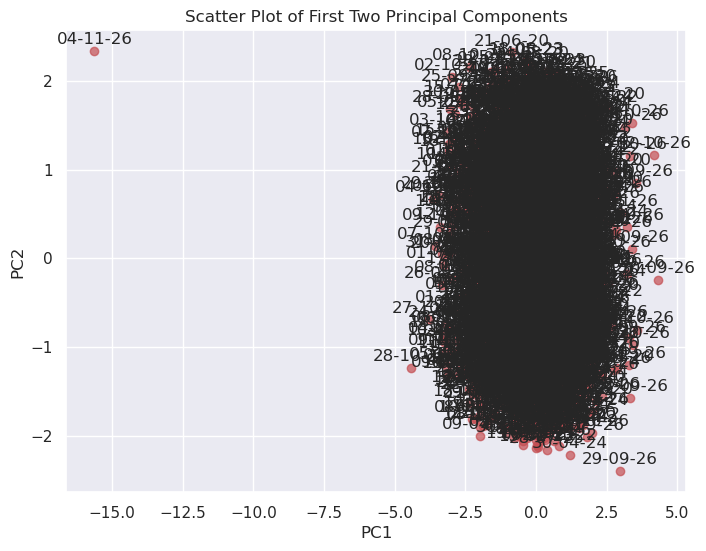

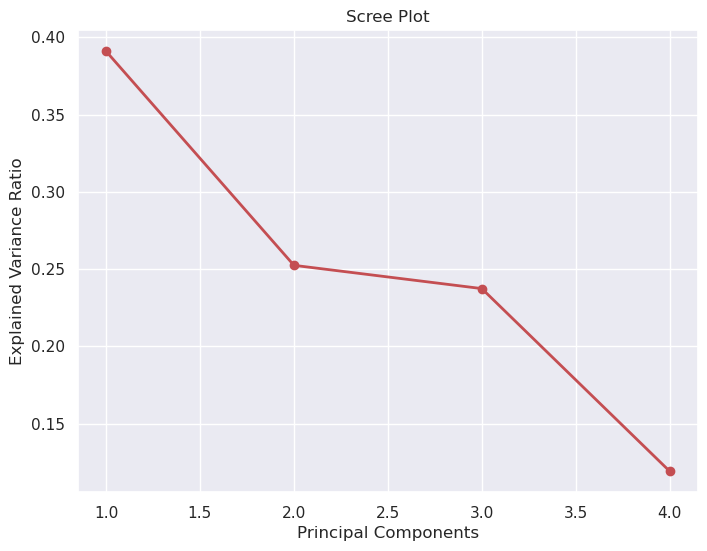

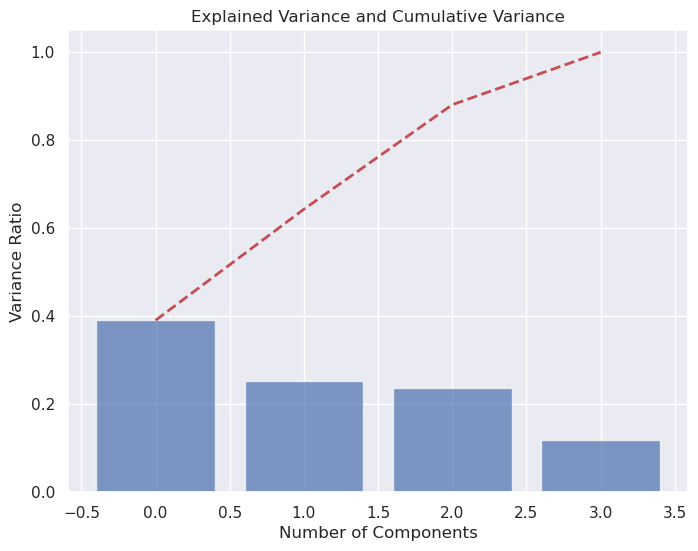

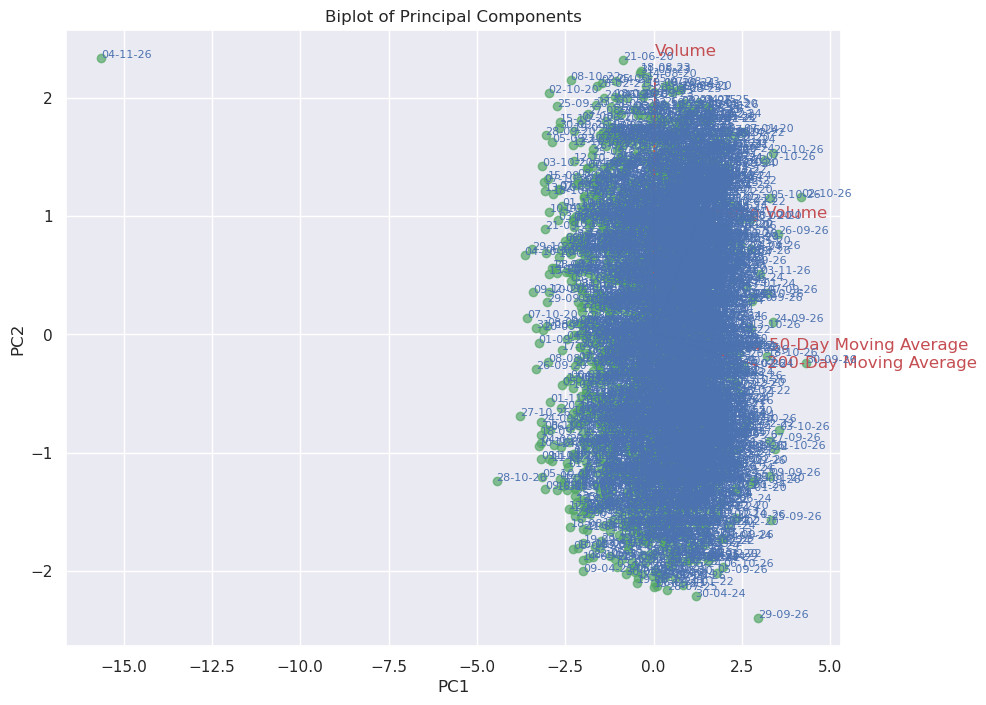

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load Dataset
df = pd.read_csv("/content/Book1.csv", index_col=0)
df = df.reset_index()
print(df.head())

# Normalize Data
df_norm = (df.iloc[:, 1:] - df.iloc[:, 1:].mean()) / df.iloc[:, 1:].std()  # Exclude 'Date'
print("\nNormalized Data:")
print(df_norm.head())

# Observations and Variables
observations = list(df['Date'])
variables = df_norm.columns

# Boxplot Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_norm, orient="v", palette="Set2")
sns.swarmplot(data=df_norm, color=".25", size=3)
plt.title("Boxplot of Normalized Data")
plt.show()

# Pairplot Visualization
sns.pairplot(df_norm)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Covariance Matrix
df_cov = df_norm.cov()
plt.figure(figsize=(8, 6))
sns.heatmap(df_cov, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
plt.title("Covariance Matrix")
plt.show()

# Principal Component Analysis
pca = PCA()
pca.fit(df_norm)
Z = pca.transform(df_norm)  # Transformed Data (PCA components)

# Scatter Plot of First 2 Principal Components
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c='r', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter Plot of First Two Principal Components")
for label, x, y in zip(observations, Z[:, 0], Z[:, 1]):
    plt.annotate(label, xy=(x, y), textcoords="offset points", xytext=(0, 5), ha='center')
plt.show()

# Scree Plot
eigenvalues = pca.explained_variance_
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues / sum(eigenvalues), 'ro-', lw=2)
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

# Explained Variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, align='center')
plt.plot(np.cumsum(explained_variance), 'r--', lw=2)
plt.title("Explained Variance and Cumulative Variance")
plt.xlabel("Number of Components")
plt.ylabel("Variance Ratio")
plt.show()

# Biplot Visualization
A = pca.components_.T  # Eigenvectors
Z1, Z2 = Z[:, 0], Z[:, 1]
A1, A2 = A[:, 0], A[:, 1]

plt.figure(figsize=(10, 8))
# Plot Arrows for Features
for i in range(len(A1)):
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='r', width=0.001, head_width=0.02)
    plt.text(A1[i]*max(Z1)*1.1, A2[i]*max(Z2)*1.1, variables[i], color='r')

# Plot Observations
plt.scatter(Z1, Z2, c='g', alpha=0.7)
for i in range(len(Z1)):
    plt.text(Z1[i], Z2[i], observations[i], color='b', fontsize=8)

plt.title("Biplot of Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Dataset Head:
          Closing Volume        Volume  50-Day Moving Average  \
Date                                                            
01-01-20        6.698408  295689.37230              55.356753   
02-01-20       61.452089  847607.11960              56.107148   
03-01-20       21.911287  804114.07660              55.246507   
04-01-20       47.445713  844474.63390              56.443637   
05-01-20       88.814258   36360.73427              57.048413   

          200-Day Moving Average  
Date                              
01-01-20               54.001058  
02-01-20               54.034503  
03-01-20               54.222753  
04-01-20               54.207440  
05-01-20               53.992278  
Intercept (beta0hat): 48.89
Slope (beta1hat): 0.00
R-squared: 0.000, P-value: 0.271


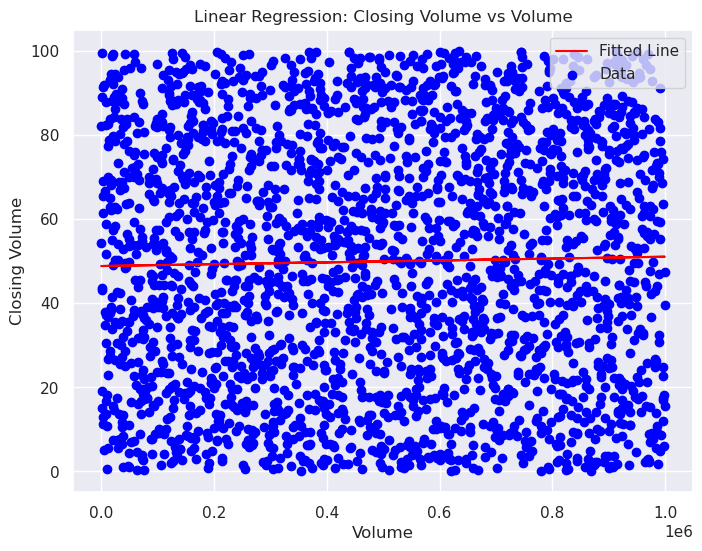

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.213
Date:                Wed, 18 Dec 2024   Prob (F-statistic):              0.271
Time:                        18:40:25   Log-Likelihood:                -11983.
No. Observations:                2500   AIC:                         2.397e+04
Df Residuals:                    2498   BIC:                         2.398e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.8869      1.152     42.438      0.0

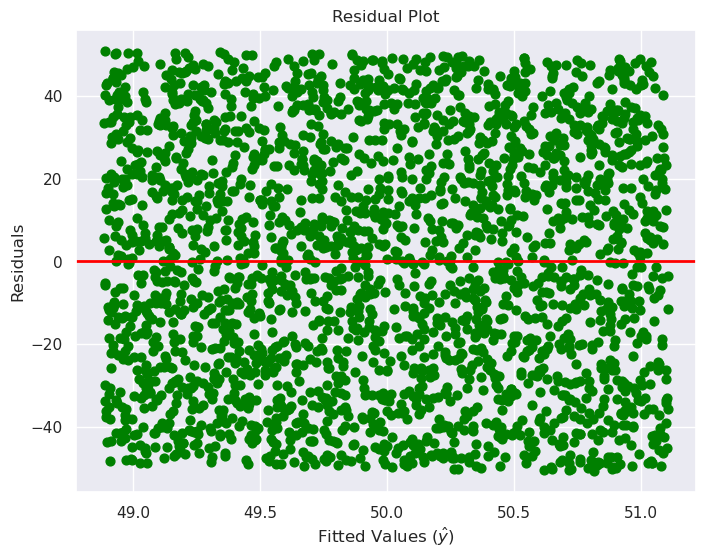

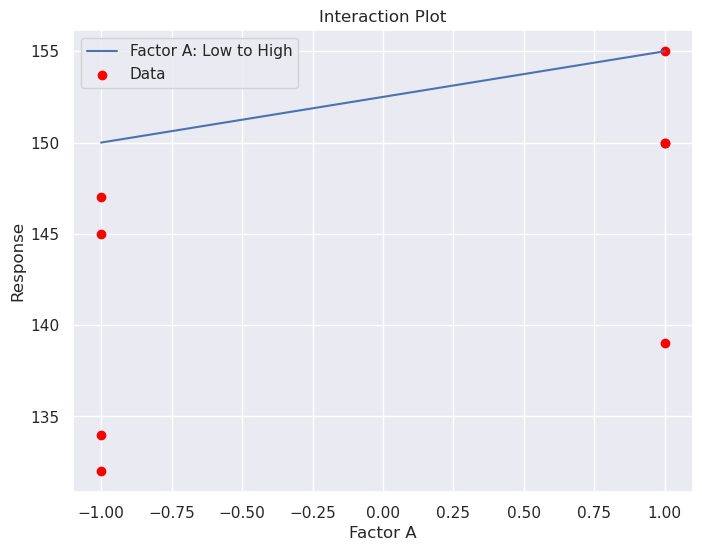


Factorial Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     6.840
Date:                Wed, 18 Dec 2024   Prob (F-statistic):             0.0471
Time:                        18:40:27   Log-Likelihood:                -20.409
No. Observations:                   8   AIC:                             48.82
Df Residuals:                       4   BIC:                             49.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load dataset
df = pd.read_csv("/content/Book1.csv", index_col=0)
print("Dataset Head:")
print(df.head())

# Linear Regression (Simple)
X = df['Volume'].values
y = df['Closing Volume'].values
beta1hat, beta0hat, r_value, p_value, std_err = stats.linregress(X, y)

print(f"Intercept (beta0hat): {beta0hat:.2f}")
print(f"Slope (beta1hat): {beta1hat:.2f}")
print(f"R-squared: {r_value**2:.3f}, P-value: {p_value:.3f}")

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, beta0hat + beta1hat * X, color='red', label='Fitted Line')
plt.xlabel("Volume")
plt.ylabel("Closing Volume")
plt.legend()
plt.title("Linear Regression: Closing Volume vs Volume")
plt.show()

# Linear Regression using pandas and ols
df_lr = df[['Volume', 'Closing Volume']].dropna()  # Drop missing values
df_lr['Volume'] = pd.to_numeric(df_lr['Volume'], errors='coerce')
df_lr['Closing Volume'] = pd.to_numeric(df_lr['Closing Volume'], errors='coerce')

# Jointplot with regression
#sns.jointplot(x='Volume', y='Closing Volume', data=df_lr, kind='reg', height=6)
#plt.show()

# Fit the model with OLS
formula = 'y ~ X'
df_lr_ols = pd.DataFrame({'X': X, 'y': y})
model = ols(formula, df_lr_ols).fit()
print(model.summary())

# ANOVA Table
anova_table = anova_lm(model)
print("\nANOVA Table:")
print(anova_table)

# Residual plot
yhat = model.fittedvalues
residuals = y - yhat

plt.figure(figsize=(8, 6))
plt.scatter(yhat, residuals, c='green', s=40)
plt.axhline(0, color='red', linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Fitted Values ($\hat{y}$)")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Design of Experiments
# Simulating a small factorial design for demonstration
data = np.array([[145, 147], [155, 150], [132, 134], [139, 150]])
n, k = 2, 2
M = np.array([[-1., -1., 1.], [1., -1., -1.], [-1., 1., -1.], [1., 1., 1.]])
R = np.tile(M, (n, 1))
g1 = R[:, 0]
g2 = R[:, 1]
y = data.flatten(order='F')

# Interaction plot
plt.figure(figsize=(8, 6))
plt.plot([-1, 1], [150, 155], 'b-', label='Factor A: Low to High')
plt.scatter(g1, y, color='red', label='Data')
plt.legend()
plt.xlabel('Factor A')
plt.ylabel('Response')
plt.title("Interaction Plot")
plt.grid(True)
plt.show()

# Fit factorial model
factorial_df = pd.DataFrame({'y': y, 'g1': g1, 'g2': g2})
formula = 'y ~ C(g1) + C(g2) + C(g1):C(g2)'
factorial_model = ols(formula, factorial_df).fit()
print("\nFactorial Model Summary:")
print(factorial_model.summary())

# Perform ANOVA on the factorial model
factorial_anova = anova_lm(factorial_model, typ=2)
print("\nFactorial ANOVA Table:")
print(factorial_anova)


## Grouped Statistics

Original Dataset:
          Closing Volume        Volume  50-Day Moving Average  \
Date                                                            
01-01-20        6.698408  295689.37230              55.356753   
02-01-20       61.452089  847607.11960              56.107148   
03-01-20       21.911287  804114.07660              55.246507   
04-01-20       47.445713  844474.63390              56.443637   
05-01-20       88.814258   36360.73427              57.048413   

          200-Day Moving Average  
Date                              
01-01-20               54.001058  
02-01-20               54.034503  
03-01-20               54.222753  
04-01-20               54.207440  
05-01-20               53.992278  

Grouped Data (Mean Statistics):
       Closing Volume         Volume  50-Day Moving Average  \
Group                                                         
1           55.356753  531553.165906              52.918715   
2           49.693950  449585.951519              51.527629

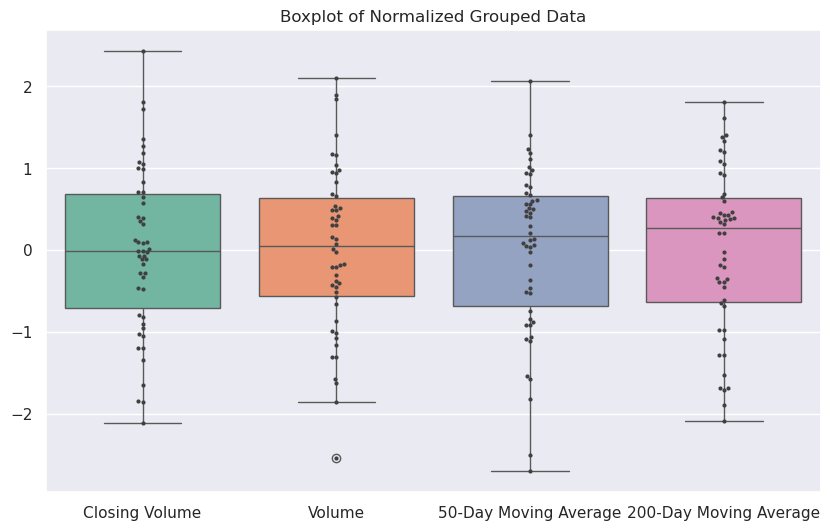

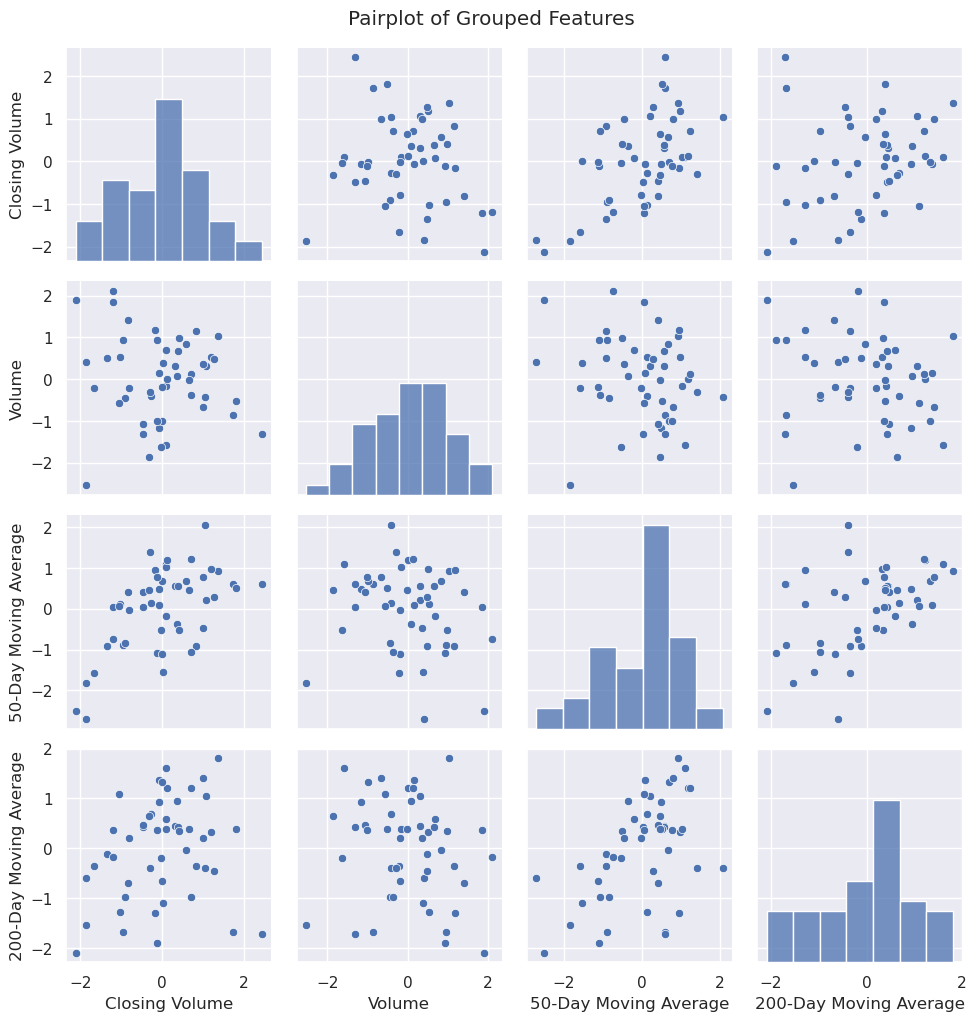

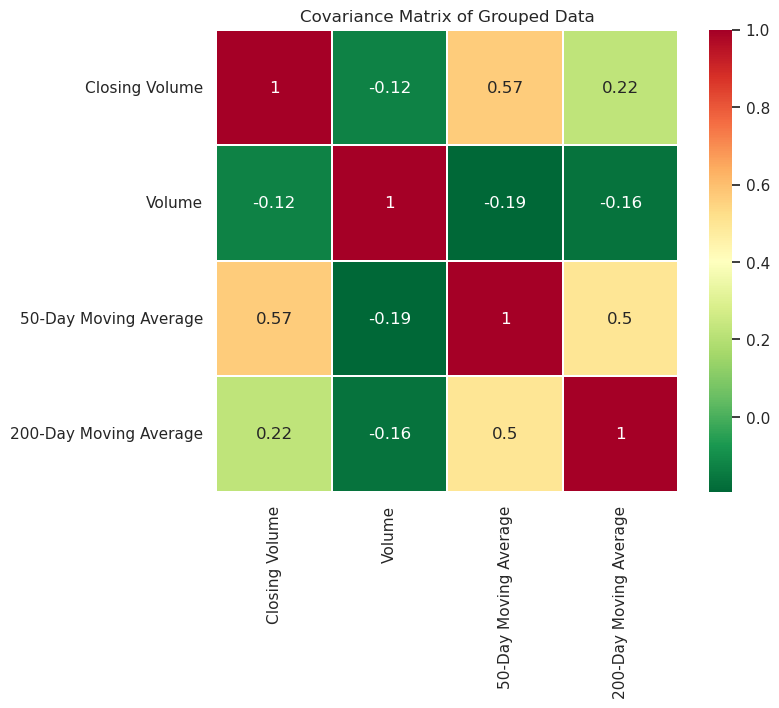

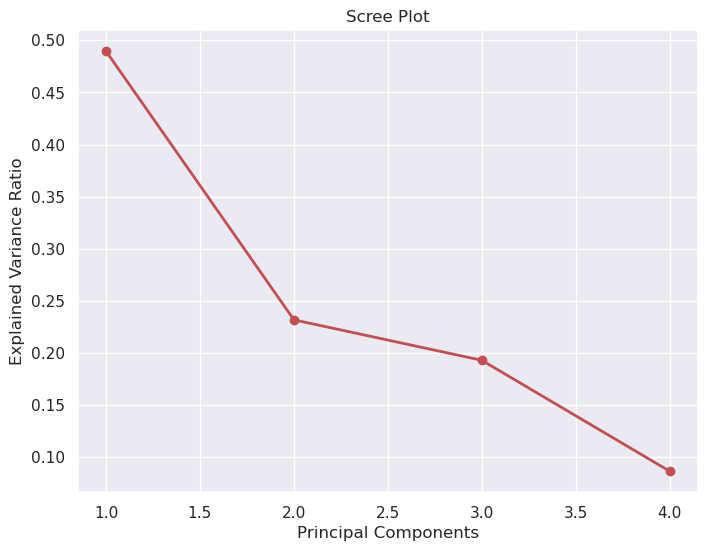

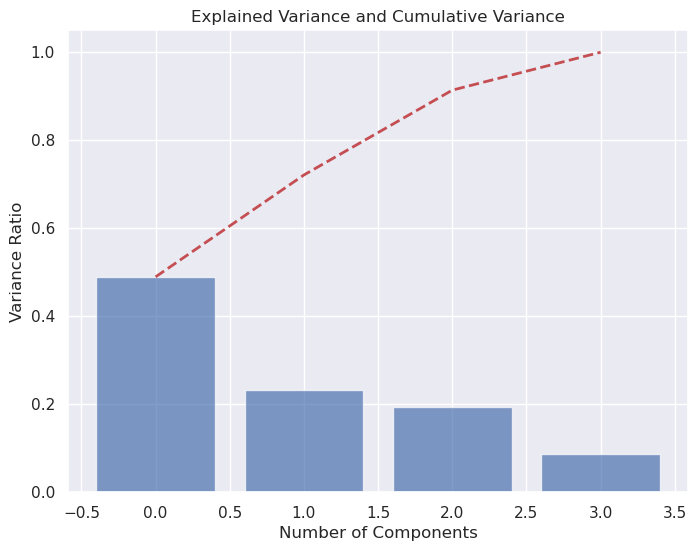

Intercept (beta0hat): 56.50
Slope (beta1hat): -0.00
R-squared: 0.015, P-value: 0.390


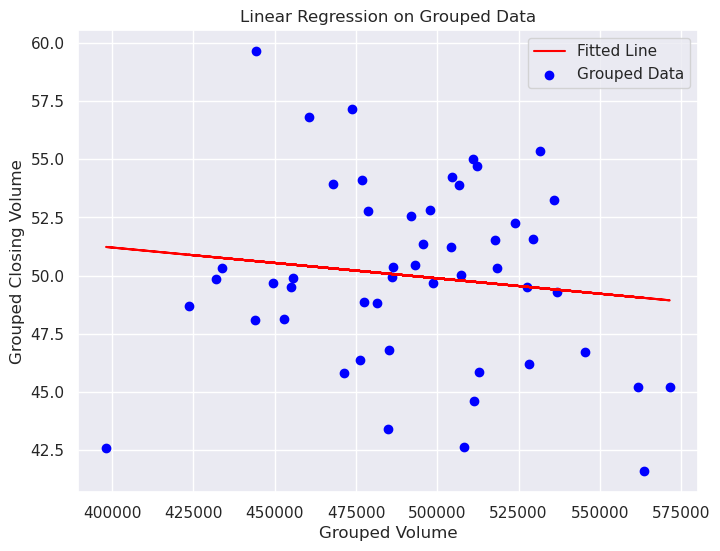

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7537
Date:                Wed, 18 Dec 2024   Prob (F-statistic):              0.390
Time:                        18:45:25   Log-Likelihood:                -138.98
No. Observations:                  50   AIC:                             282.0
Df Residuals:                      48   BIC:                             285.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.4958      7.526      7.507      0.0

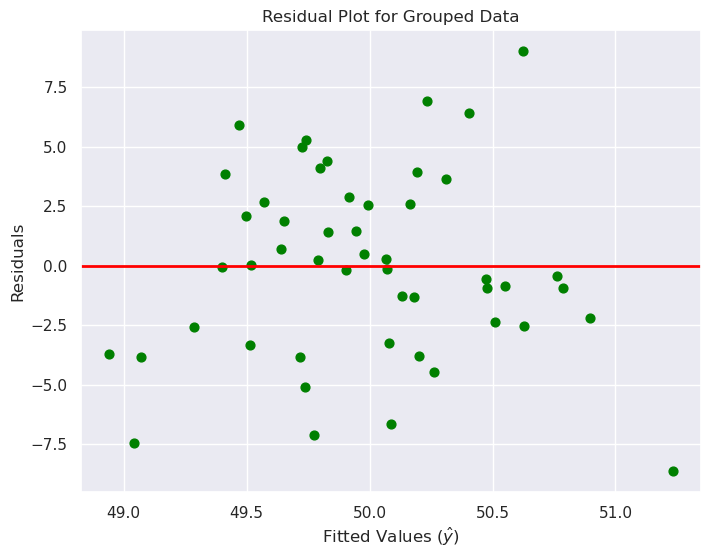

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load dataset
df = pd.read_csv("/content/Book1.csv", index_col=0)
print("Original Dataset:")
print(df.head())

# Group the data
group_size = 50
num_groups = len(df) // group_size
grouped_df = df.iloc[:num_groups * group_size]  # Trim extra rows
grouped_df['Group'] = np.repeat(range(1, num_groups + 1), group_size)

# Aggregate grouped data
grouped_stats = grouped_df.groupby('Group').mean()  # Mean statistics per group
print("\nGrouped Data (Mean Statistics):")
print(grouped_stats.head())

# Observations for visualization
observations = grouped_stats.index
variables = grouped_stats.columns

### Tutorial 3: Normalization, PCA, and Covariance ###

# Normalize grouped data
grouped_norm = (grouped_stats - grouped_stats.mean()) / grouped_stats.std()

# Boxplot Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_norm, orient="v", palette="Set2")
sns.swarmplot(data=grouped_norm, color=".25", size=3)
plt.title("Boxplot of Normalized Grouped Data")
plt.show()

# Pairplot Visualization
sns.pairplot(grouped_norm)
plt.suptitle("Pairplot of Grouped Features", y=1.02)
plt.show()

# Covariance Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(grouped_norm.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
plt.title("Covariance Matrix of Grouped Data")
plt.show()

# Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA()
Z = pca.fit_transform(grouped_norm)

# Scree Plot
eigenvalues = pca.explained_variance_
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues / sum(eigenvalues), 'ro-', lw=2)
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

# Explained Variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, align='center')
plt.plot(np.cumsum(explained_variance), 'r--', lw=2)
plt.title("Explained Variance and Cumulative Variance")
plt.xlabel("Number of Components")
plt.ylabel("Variance Ratio")
plt.show()

### Tutorial 4: Regression and ANOVA ###

# Linear Regression on Grouped Data
X = grouped_stats['Volume'].values
y = grouped_stats['Closing Volume'].values
beta1hat, beta0hat, r_value, p_value, std_err = stats.linregress(X, y)

print(f"Intercept (beta0hat): {beta0hat:.2f}")
print(f"Slope (beta1hat): {beta1hat:.2f}")
print(f"R-squared: {r_value**2:.3f}, P-value: {p_value:.3f}")

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Grouped Data')
plt.plot(X, beta0hat + beta1hat * X, color='red', label='Fitted Line')
plt.xlabel("Grouped Volume")
plt.ylabel("Grouped Closing Volume")
plt.legend()
plt.title("Linear Regression on Grouped Data")
plt.show()

# Fit OLS Model
df_lr = pd.DataFrame({'X': X, 'y': y})
model = ols('y ~ X', df_lr).fit()
print(model.summary())

# ANOVA Table
anova_table = anova_lm(model)
print("\nANOVA Table for Grouped Data:")
print(anova_table)

# Residual Plot
yhat = model.fittedvalues
residuals = y - yhat

plt.figure(figsize=(8, 6))
plt.scatter(yhat, residuals, c='green', s=40)
plt.axhline(0, color='red', linewidth=2)
plt.title("Residual Plot for Grouped Data")
plt.xlabel("Fitted Values ($\hat{y}$)")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


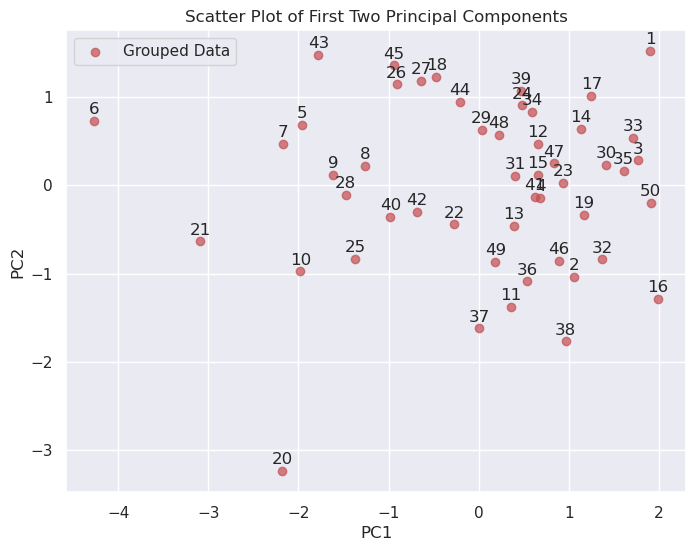

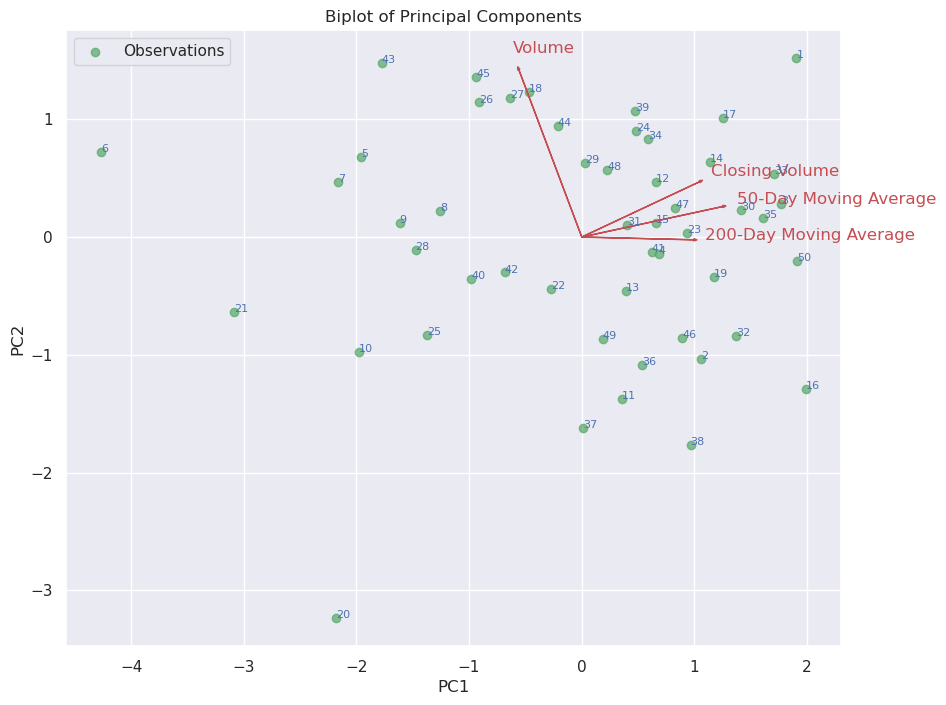

In [35]:
# Scatter Plot of First Two Principal Components
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c='r', alpha=0.7, label="Grouped Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter Plot of First Two Principal Components")
for label, x, y in zip(observations, Z[:, 0], Z[:, 1]):
    plt.annotate(label, xy=(x, y), textcoords="offset points", xytext=(0, 5), ha='center')
plt.legend()
plt.show()

# Biplot of Principal Components
A = pca.components_.T  # Eigenvectors
Z1, Z2 = Z[:, 0], Z[:, 1]
A1, A2 = A[:, 0], A[:, 1]

plt.figure(figsize=(10, 8))

# Plot Arrows for Features
for i in range(len(A1)):
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='r', width=0.001, head_width=0.02)
    plt.text(A1[i]*max(Z1)*1.1, A2[i]*max(Z2)*1.1, variables[i], color='r')

# Plot Observations
plt.scatter(Z1, Z2, c='g', alpha=0.7, label="Observations")
for i in range(len(Z1)):
    plt.text(Z1[i], Z2[i], observations[i], color='b', fontsize=8)

plt.title("Biplot of Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


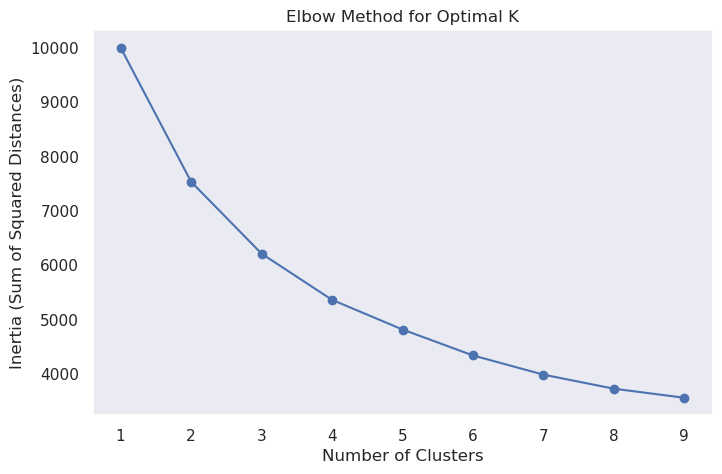

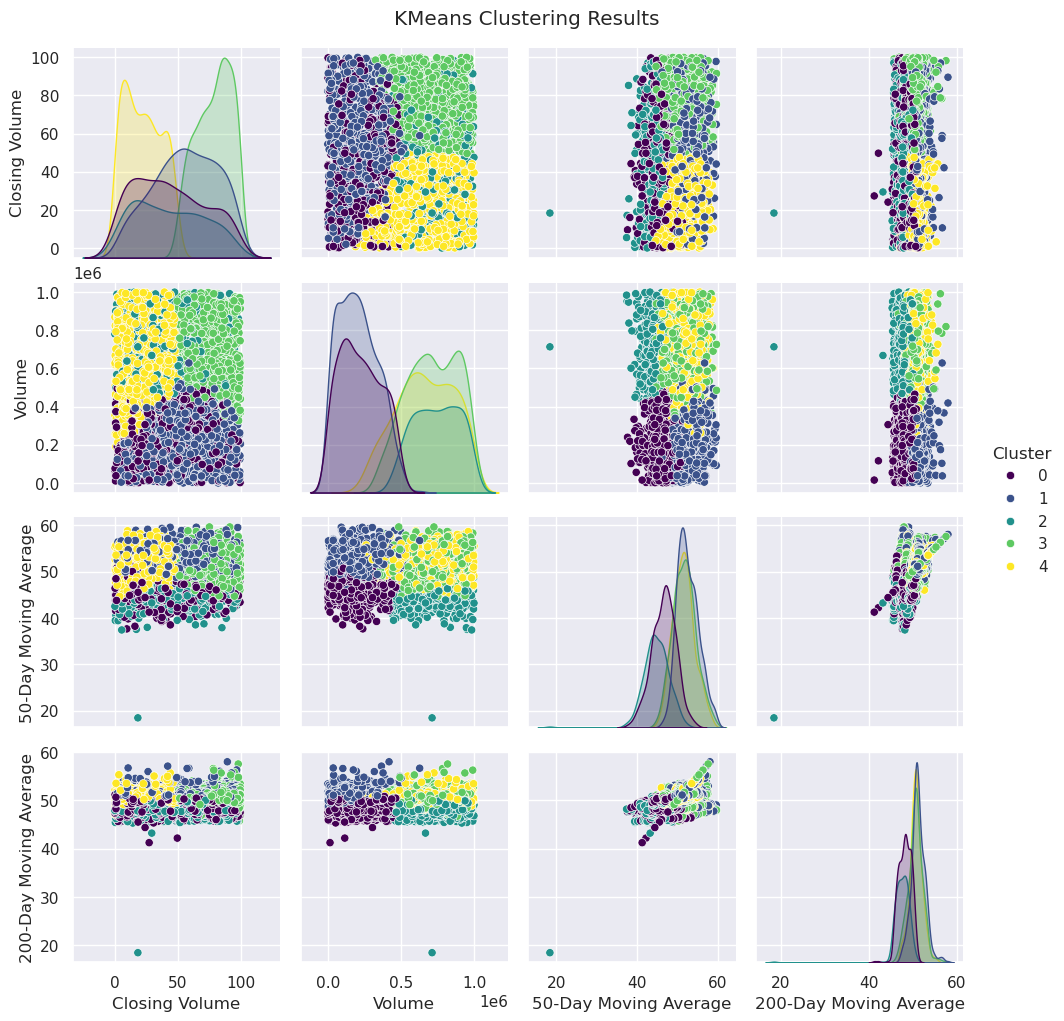

Cluster Centers (Original Scale):
   Closing Volume         Volume  50-Day Moving Average  \
0       43.650456  224281.315959              46.567297   
1       56.026197  206898.235558              52.511479   
2       43.523503  741665.317454              44.733213   
3       78.569980  711969.506628              51.629252   
4       22.414572  663471.471104              51.467246   

   200-Day Moving Average  
0               48.183881  
1               51.209230  
2               47.553054  
3               50.591959  
4               50.701729  


In [51]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
stock_data = pd.read_csv("/content/Book1.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%y')
stock_data.set_index('Date', inplace=True)

# Select features for clustering
features = stock_data[['Closing Volume', 'Volume', '50-Day Moving Average', '200-Day Moving Average']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid()
plt.show()

# Choose the optimal number of clusters (based on the elbow curve)
optimal_k = 5  # Adjust this based on the Elbow curve result

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
stock_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters using pair plots
sns.pairplot(stock_data, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle("KMeans Clustering Results", y=1.02)
plt.show()

# Display cluster centers (scaled)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                               columns=features.columns)
print("Cluster Centers (Original Scale):")
print(cluster_centers)
